In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
with open('facedata_py2_3.pkl','rb') as f:
    data = pickle.load(f)

In [2]:
# print(data['X'].shape)

In [3]:
X = data['X']
# print(X)

In [4]:
# print(X.shape)

In [5]:
mu = np.mean(X, axis=0).reshape(4096,1)
# print(mu.transpose().shape)

In [6]:
list_k  = [10,20,30,40,50,100]
list_k1 = [10]
N = 165
D = 4096

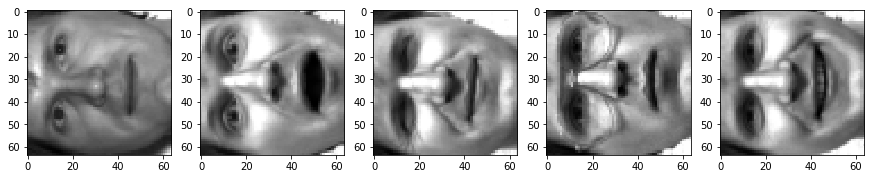

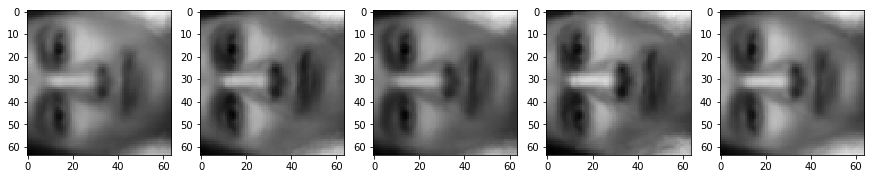

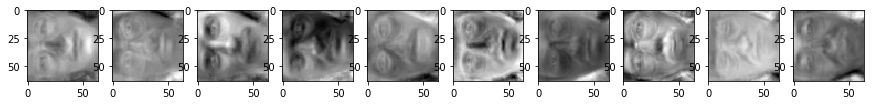

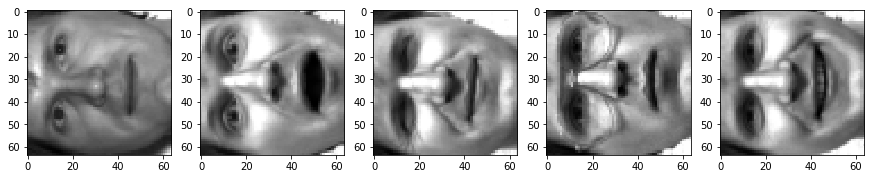

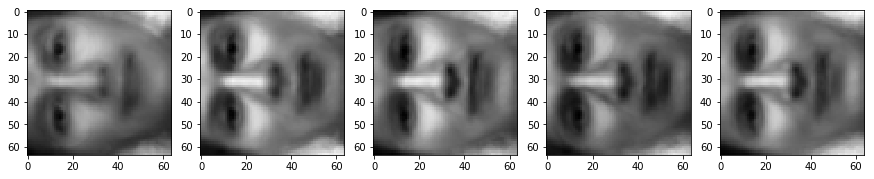

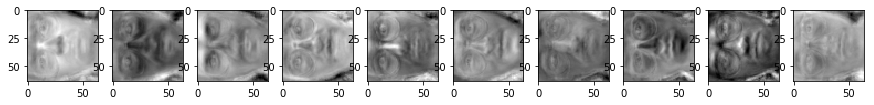

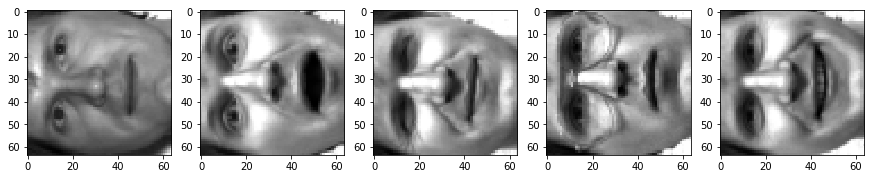

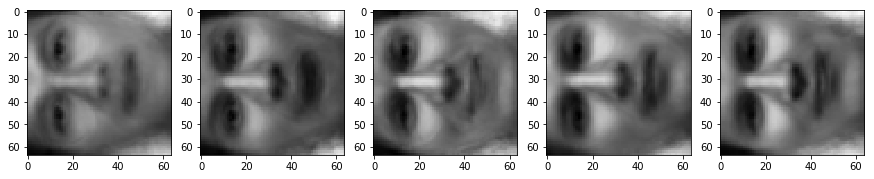

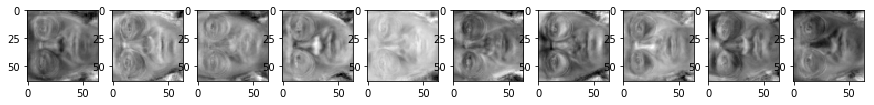

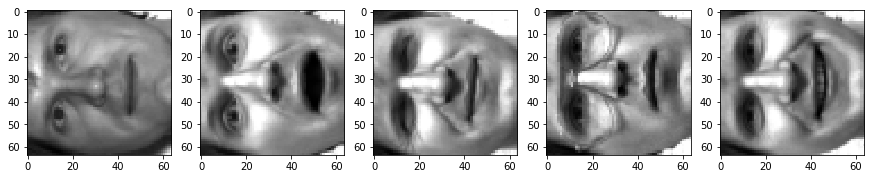

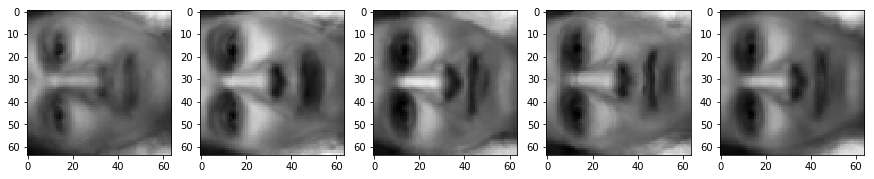

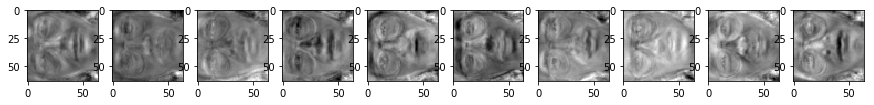

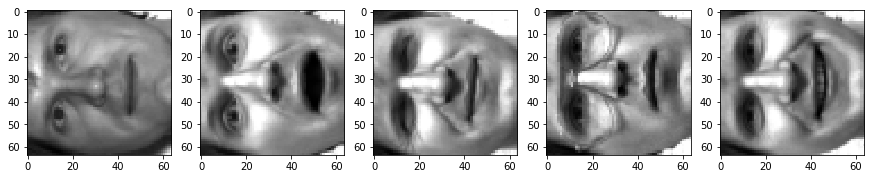

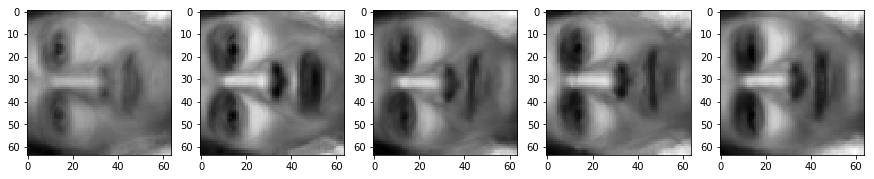

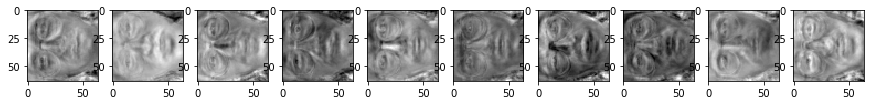

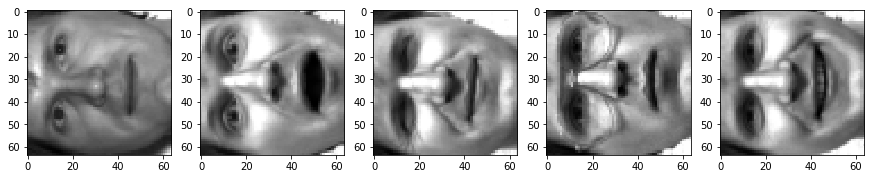

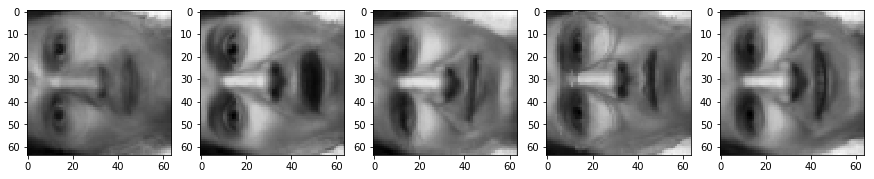

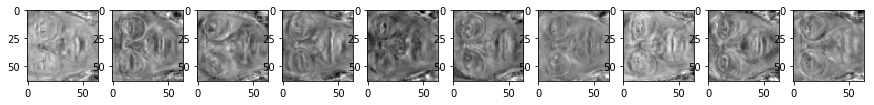

In [9]:
for k in list_k:
    for i in range(0,100):
        w = np.random.rand(D,k)
        m = np.matmul(w.transpose(),w)
        m_inv  = np.linalg.inv(m)
        temp = np.matmul(m_inv,w.transpose())
    #     print(temp.shape)
    #     print(X.transpose().shape)
        z = np.matmul(temp,X.transpose())
    #     print(z.shape)
        #for i in range(0,N):
        temp2 = np.matmul(z,X)
    #     print(temp2.shape)
        zzt = np.matmul(z,z.transpose())
        zzt_inv = np.linalg.inv(zzt)
    #     print(zzt_inv.shape)
        w_new = np.matmul(temp2.transpose(),zzt_inv)
    #     print(w_new.shape)
        w = w_new
#     print(w.shape)
    xnew = np.zeros((5,D))
#     print(mu.transpose().shape)
#     print(z[:,0].shape)
    for num in range(0,5):
        xnew[num] = mu.transpose() + np.matmul(w,z[:,num].reshape(z[:,num].shape[0],1)).transpose()
#     plt.imshow(X[0].reshape(64,64))
#     plt.imshow(xnew[0].reshape(64,64))
    fig=plt.figure(figsize=(15, 4))
    columns = 5
    rows = 1
    for i in range(1, columns*rows+1):
        img = X[i-1].reshape(64,64)
        fig.add_subplot(rows, columns, i)
        plt.imshow(img,cmap = 'gray')
#     plt.show()
    plt.savefig("original"+str(k)+".png")
    fig1=plt.figure(figsize=(15, 4))
    columns = 5
    rows = 1
    for i in range(1, columns*rows+1):
        img1 = xnew[i-1].reshape(64,64)
        fig1.add_subplot(rows, columns, i)
        plt.imshow(img1,cmap = 'gray')
#     plt.show()
    plt.savefig("recreated"+str(k)+".png")
    fig2=plt.figure(figsize=(15, 4))
    columns = 10
    rows = 1
    for i in range(1, columns*rows+1):
        img2 = w[:,i-1].reshape(64,64)
        fig2.add_subplot(rows, columns, i)
        plt.imshow(img2, cmap = 'gray')
#     plt.show()
    plt.savefig("basis_images"+str(k)+".png")
    
    
    
    
        
    
    